# Ny lanjan'ny Ariary, oharina amin'ny Dolara Amerikana 

Donnée nalaina tao amin'ny <a href="https://data.oecd.org/conversion/exchange-rates.htm#indicator-chart" >https://data.oecd.org</a>.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


# Load the CSV data into a Pandas DataFrame
raw_data = pd.read_csv('currencies1960-2022.csv')
data = raw_data[raw_data.LOCATION == 'MDG'][['TIME', 'Value']]
# data.head()

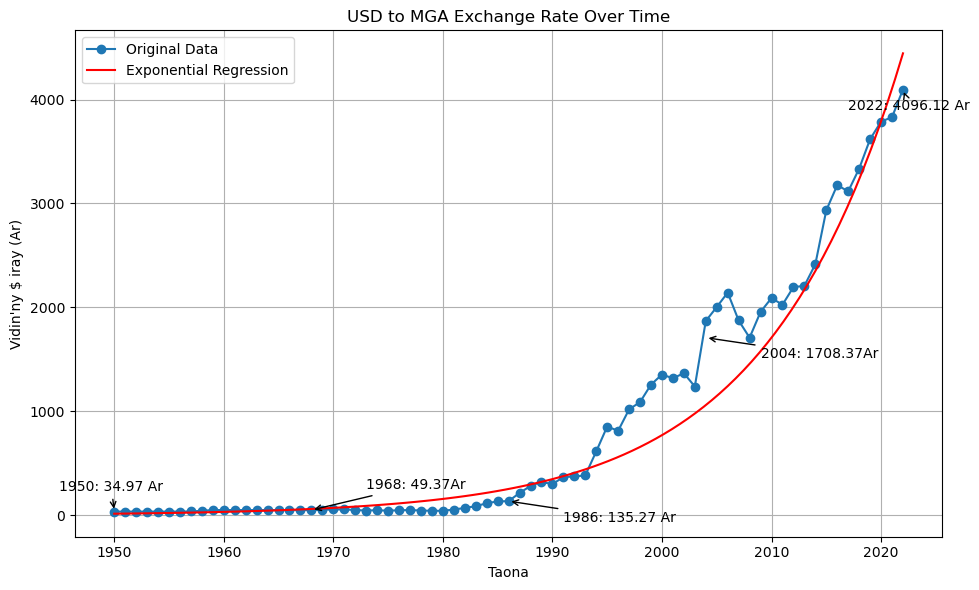

In [2]:

# Extracting columns
years = data['TIME']
usd_to_mga = data['Value']

# Plotting the time series data
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.plot(years, usd_to_mga, marker='o', linestyle='-', label='Original Data')

# Perform exponential regression
coefficients = np.polyfit(years, np.log(usd_to_mga), 1)
a = np.exp(coefficients[1])
b = coefficients[0]

# Generate points for the exponential curve
curve_years = np.linspace(min(years), max(years), 100)
curve_values = a * np.exp(b * curve_years)

# Plotting the exponential curve
plt.plot(curve_years, curve_values, color='red', label='Exponential Regression')

# Adding minimum value and median as annotations
max_value = np.max(usd_to_mga)
min_value = np.min(usd_to_mga)
median_value = np.median(usd_to_mga)
first_quartile = np.percentile(usd_to_mga, 25)
third_quartile = np.percentile(usd_to_mga, 75)


plt.annotate(f'{years.iloc[np.argmin(usd_to_mga)]}: {min_value:.2f} Ar', xy=(years.iloc[np.argmin(usd_to_mga)], min_value),
             xytext=(years.iloc[np.argmin(usd_to_mga)] - 5, min_value + 200), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'{years.iloc[len(years) // 2]}: {median_value:.2f} Ar', xy=(years.iloc[len(years) // 2], median_value),
             xytext=(years.iloc[len(years) // 2] + 5, median_value - 200), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'{years.iloc[np.argmax(usd_to_mga)]}: {max_value:.2f} Ar', xy=(years.iloc[np.argmax(usd_to_mga)], max_value),
             xytext=(years.iloc[np.argmax(usd_to_mga)] - 5, max_value - 200), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'{years.iloc[len(years) // 4]}: {first_quartile:.2f}Ar', xy=(years.iloc[len(years) // 4], first_quartile),
             xytext=(years.iloc[len(years) // 4] + 5, first_quartile + 200), arrowprops=dict(facecolor='black', arrowstyle='->'))

# plt.scatter(years.iloc[len(years) // 4], first_quartile, color='orange', s=50, label='First Quartile')

plt.annotate(f'{years.iloc[3 * len(years) // 4]}: {third_quartile:.2f}Ar', xy=(years.iloc[3 * len(years) // 4], third_quartile),
             xytext=(years.iloc[3 * len(years) // 4] + 5, third_quartile - 200), arrowprops=dict(facecolor='black', arrowstyle='->'))

# plt.scatter(years.iloc[3 * len(years) // 4], third_quartile, color='purple', s=50, label='Third Quartile')


plt.title('USD to MGA Exchange Rate Over Time')
plt.xlabel('Taona')
plt.ylabel("Vidin'ny $ iray (Ar)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


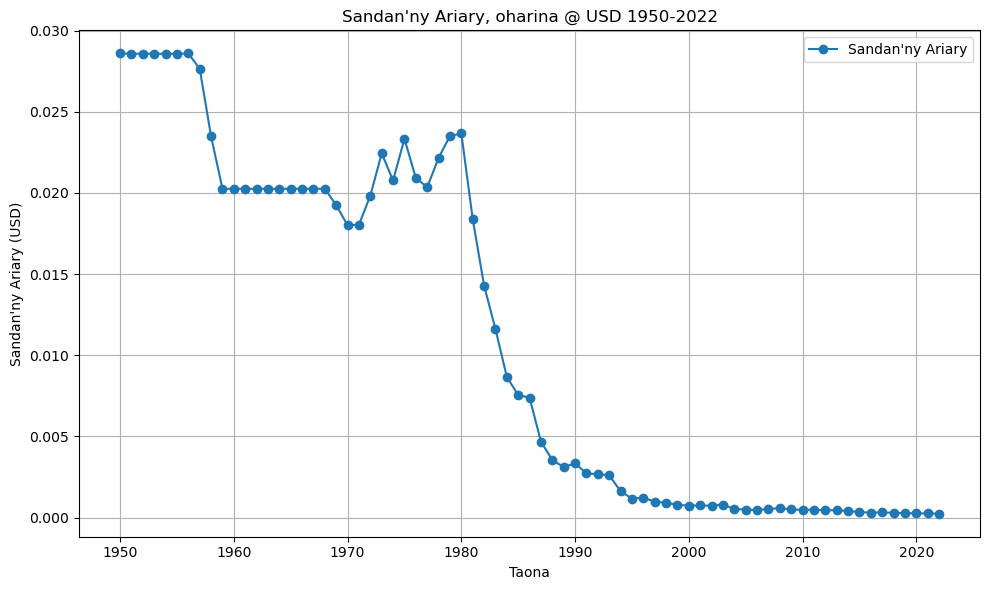

In [3]:
data['Reciprocal_Value'] = 1 / data['Value']
data.head()

# Extracting columns
years = data['TIME']
reciprocal_values = data['Reciprocal_Value']

# Plotting the time series data
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.plot(years, reciprocal_values, marker='o', linestyle='-', label='Reciprocal Value')

plt.title('Sandan\'ny Ariary, oharina @ USD 1950-2022')
plt.xlabel('Taona')
plt.ylabel('Sandan\'ny Ariary (USD)')
plt.legend(['Sandan\'ny Ariary'])
plt.grid(True)
plt.tight_layout()
plt.show()